In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.collections import LineCollection
from PIL import Image
import pickle

In [6]:
theta_star = [1, 0]
theta_bar = [0, 1]

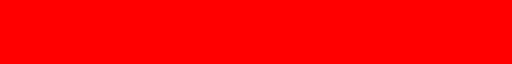

In [10]:
cmap

/tmp/ipykernel_105766/4216540279.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


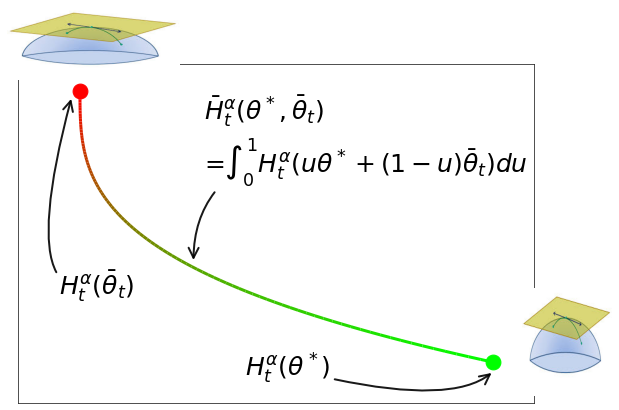

In [37]:
xx = np.linspace(0, 1, 100)

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=1)


#     ax.plot(xx ** 3 * theta_star[0] + (1 - xx ** 3) * theta_bar[0], xx ** 2 * theta_star[1] + (1 - xx) * theta_bar[1], color='black', linewidth=3, zorder=1)
        
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "lime"])
    points = np.array([xx ** 3 * theta_star[0] + (1 - xx ** 3) * theta_bar[0], xx ** 2 * theta_star[1] + (1 - xx) * theta_bar[1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm=plt.Normalize(0, 1)

    # Create a continuous norm to map from data points to colors
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    
    # Set the values used for colormapping
    lc.set_array(np.linspace(0, 1, len(xx)))
    lc.set_linewidth(3)
    line = ax.add_collection(lc)

    ax.scatter(theta_star[0], theta_star[1], s=220, color='lime', zorder=2) 
    ax.scatter(theta_bar[0], theta_bar[1], s=220, color='red', zorder=2)
#         ax.scatter(0.5 * theta_bar[0] + 0.5 * theta_star[0], 0.5 * theta_bar[0] + 0.5 * theta_star[0], s=220, color='black', zorder=2)

    ax.annotate(r'$H^{\alpha}_t(\bar{\theta}_t)$',
        xy=(theta_bar[0] - 0.02, theta_bar[1] - 0.02), xycoords='data',
        xytext=(-0.05, 0.25), textcoords='data', color='black', fontsize=25,
        arrowprops=dict(arrowstyle='->',
                        connectionstyle='angle3,angleA=15,angleB=75', color='black', linewidth=2, alpha=0.9),
        )

    ax.annotate(r'$H^{\alpha}_t(\theta^*)$',
        xy=(theta_star[0], theta_star[1] - 0.035), xycoords='data',
        xytext=(0.4, -0.05), textcoords='data', color='black', fontsize=25,
        arrowprops=dict(arrowstyle='->',
                        connectionstyle='angle3,angleA=-15,angleB=40', color='black', linewidth=2, alpha=0.9),
        )

    x = 0.65
    ax.annotate(r'$\bar{H}^\alpha_t(\theta^*, \bar{\theta}_t)$' + '\n' + r'=$\int_{0}^1 H^{\alpha}_t(u\theta^* + (1-u) \bar{\theta}_t)du$',
        xy=(x ** 3 * theta_star[0] + (1 - x ** 3) * theta_bar[0], x * theta_star[1] + (1 - x) * theta_bar[1] + 0.02), xycoords='data',
        xytext=(0.3, 0.7), textcoords='data', color='black', fontsize=25,
        arrowprops=dict(arrowstyle='->',
                        connectionstyle='angle3,angleA=0,angleB=90', color='black', linewidth=2, alpha=0.9),
        )

    ax.set_xticks([])        
    ax.set_yticks([])

    ax.set_xlim([-0.15, 1.1])
    ax.set_ylim([-0.15, 1.1])

    # im = plt.imread('riemann.jpeg')
    im = Image.open('riemann.jpeg')
    im.resize((200,200))

    newax1 = fig.add_axes([theta_bar[0], theta_bar[1] - 0.17, 0.3,0.3], anchor='NE', zorder=1)
    newax1.imshow(im, aspect=0.7)
    newax1.axis('off')

    newax2 = fig.add_axes([theta_star[0] - 0.25, theta_star[1] + 0.05, 0.3, 0.3], anchor='NE', zorder=1)
    newax2.imshow(im, aspect=2.)
    newax2.axis('off')

    plt.tight_layout()

    plt.savefig('local_metrics_transportation.pdf', format='pdf', bbox_inches='tight')